In [1]:
pip install pandas-datareader

In [2]:
import pandas_datareader.data as web
import datetime

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
import datetime

In [5]:

import yfinance as yfin


from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

spy = pdr.get_data_yahoo('SPY', start='2022-10-24', end='2022-12-23')

print(spy)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-24  375.890015  380.059998  373.109985  378.869995  372.998199   
2022-10-25  378.790009  385.250000  378.670013  384.920013  378.954437   
2022-10-26  381.619995  387.579987  381.350006  382.019989  376.099365   
2022-10-27  383.070007  385.000000  379.329987  379.980011  374.091003   
2022-10-28  379.869995  389.519989  379.679993  389.019989  382.990875   
2022-10-31  386.440002  388.399994  385.260010  386.209991  380.224365   
2022-11-01  390.140015  390.390015  383.290009  384.519989  378.560608   
2022-11-02  383.899994  388.630005  374.760010  374.869995  369.060181   
2022-11-03  371.470001  374.200012  368.790009  371.010010  365.260010   
2022-11-04  377.000000  378.869995  370.000000  376.350006  370.517212   
2022-11-07  377.709991  380.570007  375.529

In [6]:
spy.to_csv("spy.csv")

In [7]:
spy = pd.read_csv("spy.csv")
print(spy.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2022-10-24  375.890015  380.059998  373.109985  378.869995  372.998199   
1  2022-10-25  378.790009  385.250000  378.670013  384.920013  378.954437   
2  2022-10-26  381.619995  387.579987  381.350006  382.019989  376.099365   
3  2022-10-27  383.070007  385.000000  379.329987  379.980011  374.091003   
4  2022-10-28  379.869995  389.519989  379.679993  389.019989  382.990875   

      Volume  
0   85436900  
1   78846300  
2  104087300  
3   81971800  
4  100302000  


In [8]:
#Converting to a date time object
spy.index = pd.to_datetime(spy['Date'], format='%Y-%m-%d')

In [9]:
print(spy.index)

DatetimeIndex(['2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-31', '2022-11-01', '2022-11-02',
               '2022-11-03', '2022-11-04', '2022-11-07', '2022-11-08',
               '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-14',
               '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18',
               '2022-11-21', '2022-11-22', '2022-11-23', '2022-11-25',
               '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
               '2022-12-02', '2022-12-05', '2022-12-06', '2022-12-07',
               '2022-12-08', '2022-12-09', '2022-12-12', '2022-12-13',
               '2022-12-14', '2022-12-15', '2022-12-16', '2022-12-19',
               '2022-12-20', '2022-12-21', '2022-12-22'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [10]:
# Calculating the daily return using the open and close values
spy['daily_return'] = (spy['Open']/ spy['Close'].shift(1)) -1

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'SPY Stock daily returns'}, xlabel='Date'>

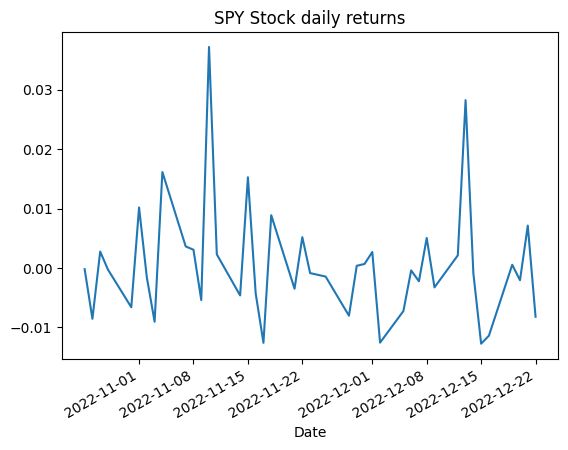

In [12]:
spy['daily_return'].plot(title='SPY Stock daily returns')

In [13]:
spy.dropna(inplace = True)


In [14]:
#splitting the datetime to create the train and test dataset
train = spy[spy.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test = spy[spy.index > pd.to_datetime("2020-11-01", format='%Y-%m-%d')]



In [17]:
spy.to_csv("spy1.csv")

In [18]:
# Converting the Date Time to a dataframe and reading it. spy1 includes the daily return.
import pandas as pd

df = pd.read_csv('spy1.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df

,Date,Date.1,Open,High,Low,Close,Adj Close,Volume,daily_return
0,2022-10-25,2022-10-25,378.790009,385.250000,378.670013,384.920013,378.954437,78846300,-0.000211
1,2022-10-26,2022-10-26,381.619995,387.579987,381.350006,382.019989,376.099365,104087300,-0.008573
2,2022-10-27,2022-10-27,383.070007,385.000000,379.329987,379.980011,374.091003,81971800,0.002749
3,2022-10-28,2022-10-28,379.869995,389.519989,379.679993,389.019989,382.990875,100302000,-0.000290
4,2022-10-31,2022-10-31,386.440002,388.399994,385.260010,386.209991,380.224365,96631300,-0.006632
5,2022-11-01,2022-11-01,390.140015,390.390015,383.290009,384.519989,378.560608,85407600,0.010176
6,2022-11-02,2022-11-02,383.899994,388.630005,374.760010,374.869995,369.060181,126990400,-0.001612
7,2022-11-03,2022-11-03,371.470001,374.200012,368.790009,371.010010,365.260010,87100100,-0.009070
8,2022-11-04,2022-11-04,377.000000,378.869995,370.000000,376.350006,370.517212,103505200,0.016145
9,2022-11-07,2022-11-07,377.709991,380.570007,375.529999,379.950012,374.061462,68286900,0.003614


In [20]:
from sklearn.linear_model import LinearRegression
#Defining Date as the predictor variable and Volume as the target variable
X = df[['Date']]
y = df['daily_return']

model = LinearRegression()
model.fit(X, y)

print(model.coef_)
print(model.intercept_)

[-7.19792473e-19]
1.2019904055945947


In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

In [22]:

import statsmodels.api as sm
import numpy as np
np.random.seed(100)

data = np.sort(np.random.uniform(0, 1, size=30))
steps_to_predict = 5

model = sm.tsa.statespace.SARIMAX(endog=data,order=(2,0,0),enforce_stationarity=False)
sarima = model.fit()
print(sarima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(2, 0, 0)   Log Likelihood                  52.904
Date:                Tue, 19 Sep 2023   AIC                            -99.807
Time:                        13:43:34   BIC                            -95.811
Sample:                             0   HQIC                           -98.586
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2965      0.193      6.730      0.000       0.919       1.674
ar.L2         -0.2551      0.209     -1.219      0.223      -0.665       0.155
sigma2         0.0013      0.000      3.871      0.0

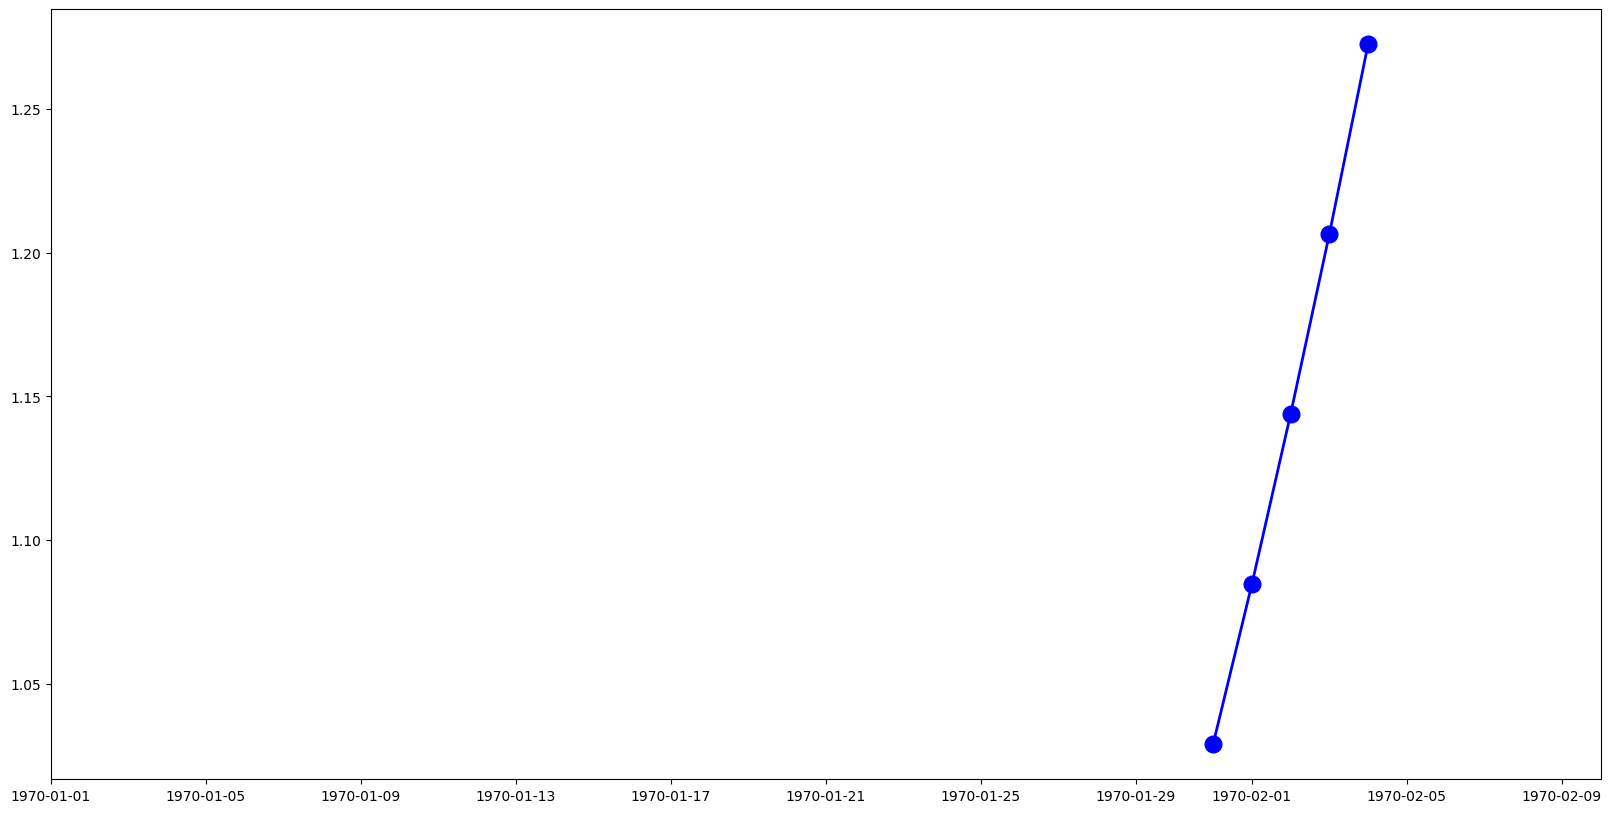

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_xlim(0,40)
ax.plot(train, "ro-", linewidth=2, markersize=12)
ax.plot(list(range(30,35)), sarima.forecast(steps_to_predict), "bo-", linewidth=2, markersize=12)

In [24]:
spy.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,,
2022-12-16,2022-12-16,385.179993,386.579987,381.040009,383.269989,379.062653,119858000,-0.011421
2022-12-19,2022-12-19,383.470001,383.820007,378.279999,380.019989,375.848358,79878100,0.000522
2022-12-20,2022-12-20,379.230011,382.230011,377.850006,380.540009,376.362640,74427200,-0.002079
2022-12-21,2022-12-21,383.250000,387.410004,382.690002,386.230011,381.990204,78167400,0.007121
2022-12-22,2022-12-22,383.049988,386.209991,374.769989,380.720001,376.540680,100120900,-0.008233


In [25]:
range_date = pd.date_range(start ='25-10-2022', end ='22-12-2022',
                                                   freq ='Min')

<ipython-input-25-c12ed8828b6d>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  range_date = pd.date_range(start ='25-10-2022', end ='22-12-2022',


In [26]:
spy.sample(5, random_state=0)

,Date,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,,
2022-12-07,2022-12-07,392.940002,395.640015,391.970001,393.160004,387.066742,65927900,-0.002260
2022-12-15,2022-12-15,394.299988,395.250000,387.890015,389.630005,383.591431,117705900,-0.012769
2022-12-02,2022-12-02,402.250000,407.859985,402.140015,406.910004,400.603607,85342700,-0.012593
2022-10-31,2022-10-31,386.440002,388.399994,385.260010,386.209991,380.224365,96631300,-0.006632
2022-11-08,2022-11-08,381.109985,385.119995,377.720001,382.000000,376.079681,84641100,0.003053


In [27]:
spy.loc['2022-12-22']

Date            2022-12-22
Open            383.049988
High            386.209991
Low             374.769989
Close           380.720001
Adj Close        376.54068
Volume           100120900
daily_return     -0.008233
Name: 2022-12-22 00:00:00, dtype: object

In [28]:
spy2 = spy.set_index('Date')

In [29]:
spy2.head(3)

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2022-10-25,378.790009,385.250000,378.670013,384.920013,378.954437,78846300,-0.000211
2022-10-26,381.619995,387.579987,381.350006,382.019989,376.099365,104087300,-0.008573
2022-10-27,383.070007,385.000000,379.329987,379.980011,374.091003,81971800,0.002749


In [30]:
spy2.index

Index(['2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-31',
       '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-07',
       '2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-14',
       '2022-11-15', '2022-11-16', '2022-11-17', '2022-11-18', '2022-11-21',
       '2022-11-22', '2022-11-23', '2022-11-25', '2022-11-28', '2022-11-29',
       '2022-11-30', '2022-12-01', '2022-12-02', '2022-12-05', '2022-12-06',
       '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-12', '2022-12-13',
       '2022-12-14', '2022-12-15', '2022-12-16', '2022-12-19', '2022-12-20',
       '2022-12-21', '2022-12-22'],
      dtype='object', name='Date')

In [31]:
spy2.loc['2022-10-25':'2022-12-21']

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2022-10-25,378.790009,385.250000,378.670013,384.920013,378.954437,78846300,-0.000211
2022-10-26,381.619995,387.579987,381.350006,382.019989,376.099365,104087300,-0.008573
2022-10-27,383.070007,385.000000,379.329987,379.980011,374.091003,81971800,0.002749
2022-10-28,379.869995,389.519989,379.679993,389.019989,382.990875,100302000,-0.000290
2022-10-31,386.440002,388.399994,385.260010,386.209991,380.224365,96631300,-0.006632
2022-11-01,390.140015,390.390015,383.290009,384.519989,378.560608,85407600,0.010176
2022-11-02,383.899994,388.630005,374.760010,374.869995,369.060181,126990400,-0.001612
2022-11-03,371.470001,374.200012,368.790009,371.010010,365.260010,87100100,-0.009070
2022-11-04,377.000000,378.869995,370.000000,376.350006,370.517212,103505200,0.016145


In [32]:
import matplotlib.pyplot as plt

In [33]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

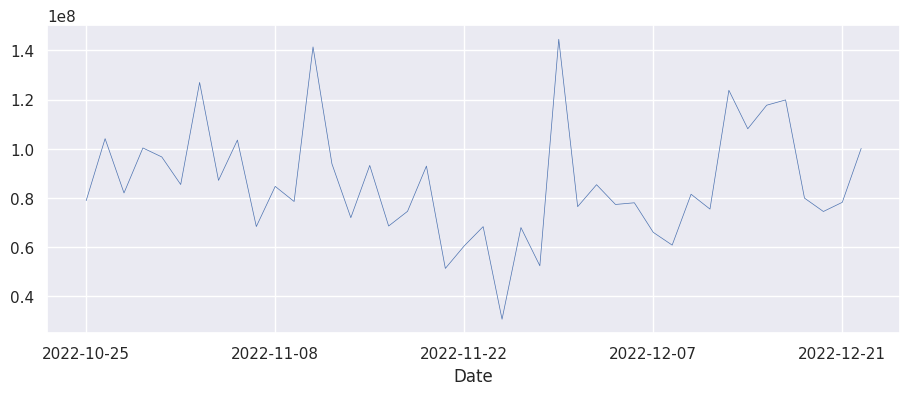

In [34]:
spy2['Volume'].plot(linewidth=0.5);

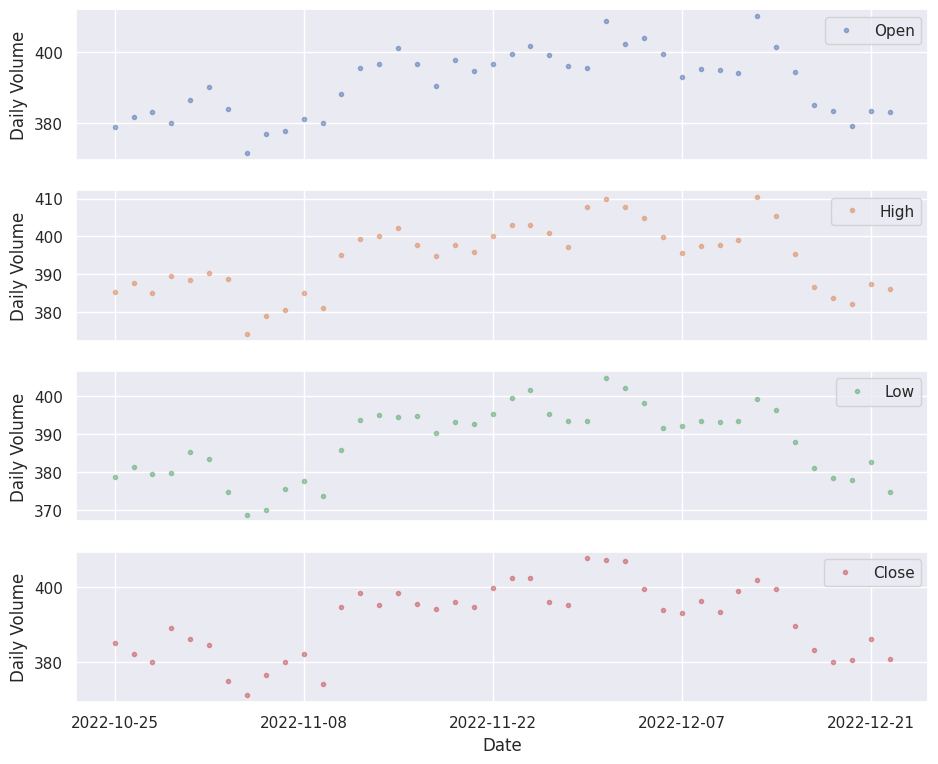

In [35]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = spy2[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Volume')

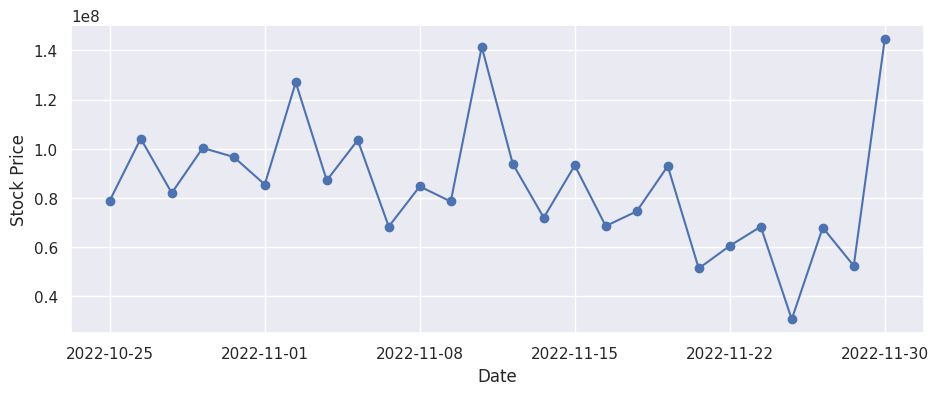

In [36]:
ax = spy2.loc['2022-10':'2022-12', 'Volume'].plot(marker='o', linestyle='-')
ax.set_ylabel('Stock Price');

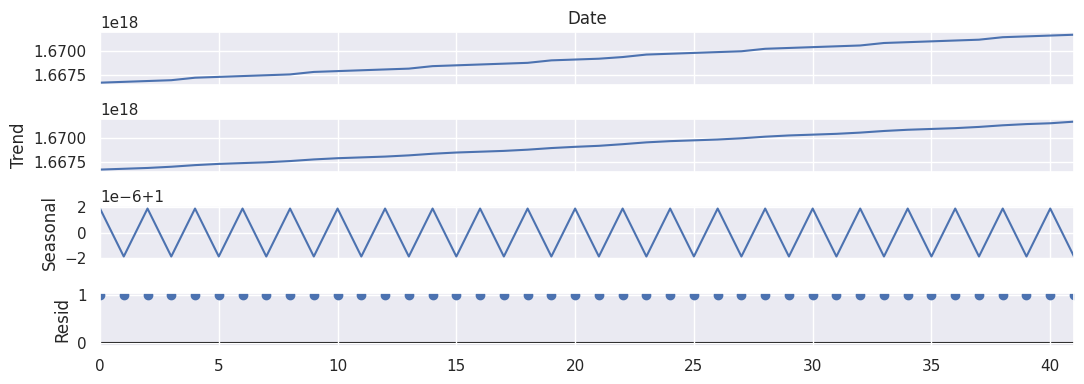

In [42]:
#seasonal decompose works only when it is a pandas dataframe so always remember to use the dataframe. We implemenet a multipicative model here.The multiplicative model is useful when the seasonal variation increases over time.
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df.Date, model='multiplicative', extrapolate_trend='freq', period=2)
decompose_data.plot();

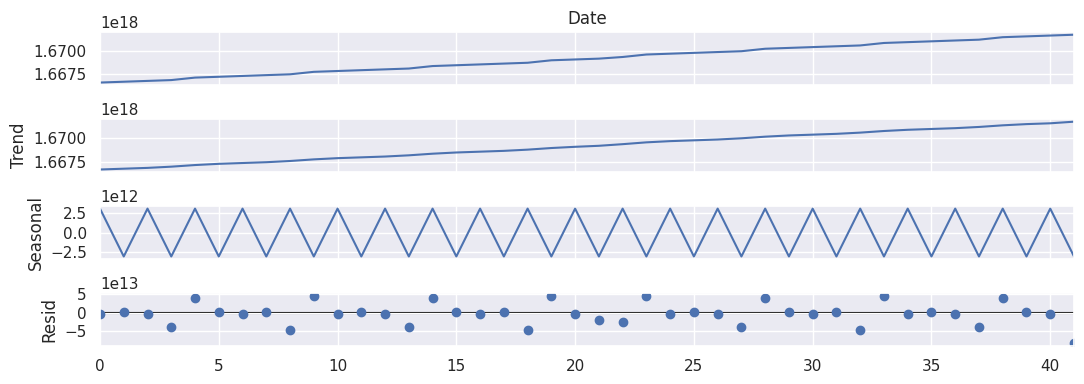

In [43]:
#seasonal decompose works only when it is a pandas dataframe so always remember to use the dataframe. We implemenet a additive model model here.The additive model is useful when the seasonal variation is relatively constant over time
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df.Date, model='additive', extrapolate_trend='freq', period=2)
decompose_data.plot();

In [44]:
#Stationarity means that the statistical properties of a time series i.e. mean, variance and covariance do not change over time.
#Two statistical tests would be used to check the stationarity of a time series – Augmented Dickey Fuller (“ADF”) test and Kwiatkowski-Phillips-Schmidt-Shin (“KPSS”) test.
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df.Date, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  2.7509985189107455
2. P-Value :  1.0
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 36
5. Critical Values :
	 1% :  -3.626651907578875
	 5% :  -2.9459512825788754
	 10% :  -2.6116707716049383


In [47]:
#Stationarity means that the statistical properties of a time series i.e. mean, variance and covariance do not change over time.
#Two statistical tests would be used to check the stationarity of a time series – Augmented Dickey Fuller (“ADF”) test and Kwiatkowski-Phillips-Schmidt-Shin (“KPSS”) test.
from statsmodels.tsa.stattools import kpss
dftest1 = kpss(df.Date,  regression="c", nlags="auto")
print("1. KPSS : ",dftest1[0])
print("2. P-Value : ", dftest1[1])
print("3. Num Of Lags : ", dftest1[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest1[3])
print("5. Critical Values :")
for key, val in dftest1[3].items():
    print("\t",key, ": ", val)

1. KPSS :  0.9479174557182305
2. P-Value :  0.01
3. Num Of Lags :  4
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
5. Critical Values :
	 10% :  0.347
	 5% :  0.463
	 2.5% :  0.574
	 1% :  0.739


<ipython-input-47-226064f2deda>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  dftest1 = kpss(df.Date,  regression="c", nlags="auto")


In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [60]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.7 MB/s eta 0:00:00


In [67]:
import pmdarima as pm
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to Stock Price dataset
arima_fit = auto_arima(spy.index, start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2025.103, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2028.602, Time=1.29 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2185.742, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=2026.246, Time=0.27 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=2026.244, Time=0.13 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=2028.169, Time=0.57 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=7105.537, Time=0.09 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=2027.445, Time=0.21 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=6904.885, Time=0.55 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 4.759 seconds


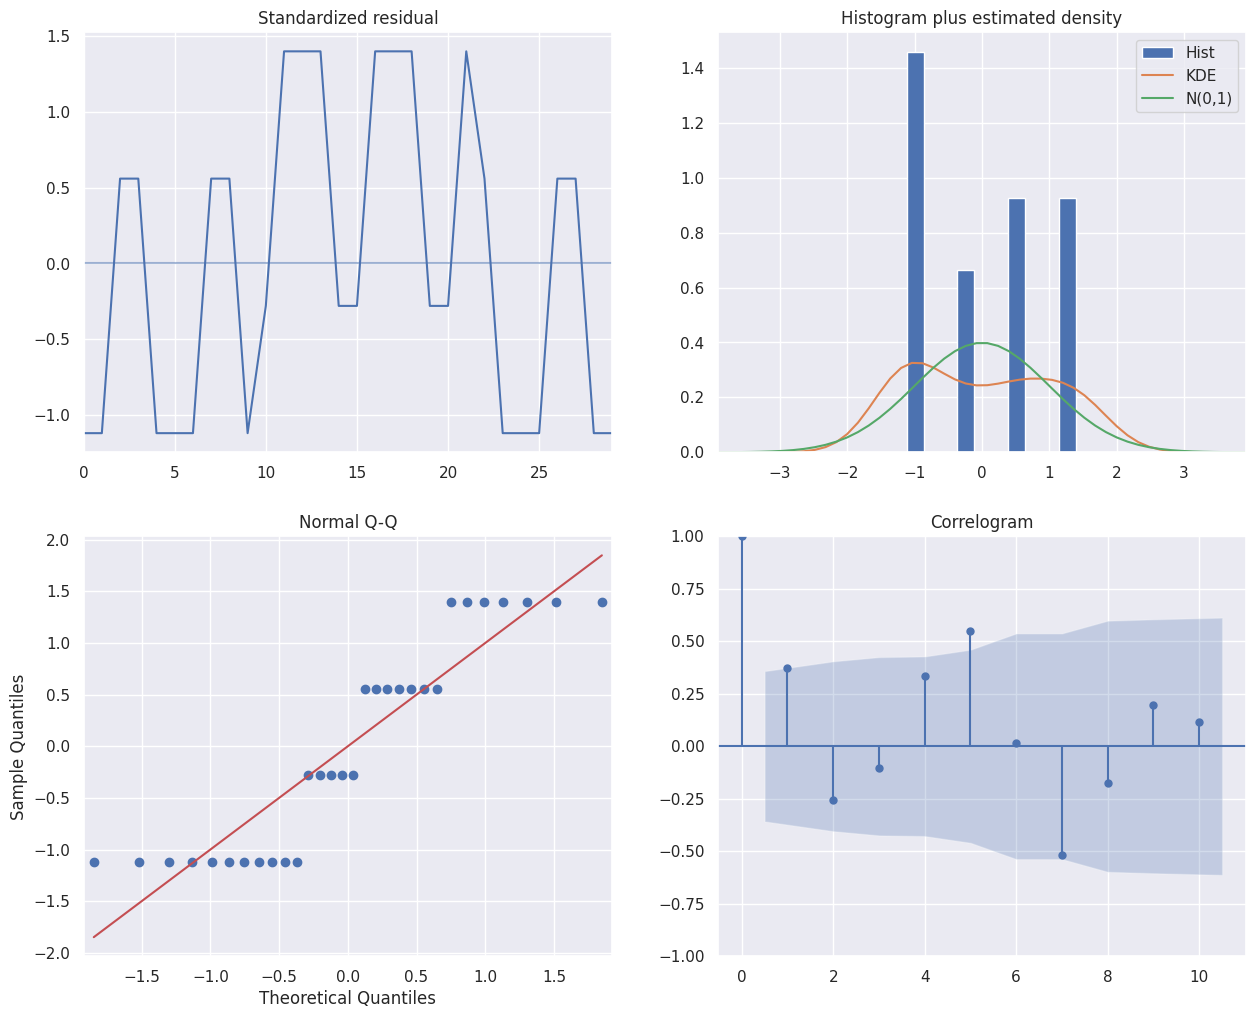

In [72]:
arima_fit.plot_diagnostics(figsize=(15,12))
plt.show()